In [27]:
import torch
import torch.nn as nn

import numpy as np
import matplotlib.pyplot as plt

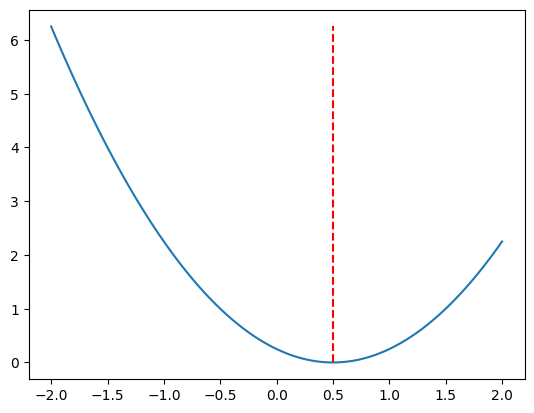

In [28]:
lossfunMSE = nn.MSELoss()

y_pred = torch.linspace(-2,2,101)
y = torch.tensor(.5)

L = np.zeros(101)
for i, yy in enumerate(y_pred):
    L[i] = lossfunMSE(yy,y)
    
plt.plot(y_pred, L, label="Loss")
plt.plot([y,y], [0,np.max(L)], "r--", label="True value")
plt.show()

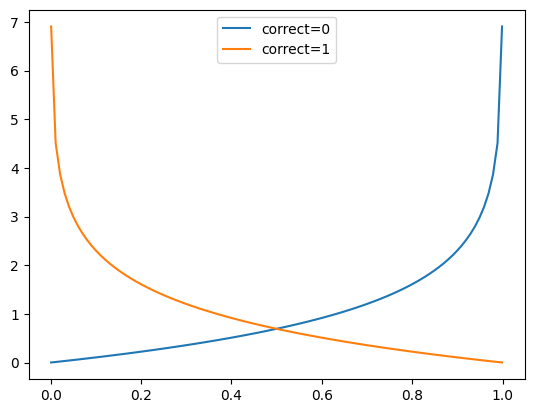

In [29]:
lossfunBCE = nn.BCELoss()

y_pred = torch.linspace(.001,.999,101)
y1 = torch.tensor(0.)
y2 = torch.tensor(1.)

L = np.zeros((101,2))
for i, yy in enumerate(y_pred):
    L[i,0] = lossfunBCE(yy,y1)
    L[i,1] = lossfunBCE(yy,y2)
    
plt.plot(y_pred, L, label="Loss")
plt.legend(["correct=0", "correct=1"])

In [30]:
lossfunCCE = nn.CrossEntropyLoss()

yHat = torch.tensor([[1.,5,3]])

for i in range(3):
    crrAnswer = torch.tensor([i])
    thisLoss = lossfunCCE(yHat, crrAnswer).item()
    print(i, " ", thisLoss)

0   4.142931938171387
1   0.14293169975280762
2   2.1429316997528076


In [31]:
# Errado
sm = nn.Softmax(dim=1)
y_pred = sm(yHat)

for i in range(3):
    crrAnswer = torch.tensor([i])
    thisLoss = lossfunCCE(y_pred, crrAnswer).item()
    print(i, " ", thisLoss)


0   1.492588758468628
1   0.6416517496109009
2   1.3911546468734741


In [32]:
sm = nn.LogSoftmax(dim=1)
y_pred_2 = sm(yHat)

yHat, y_pred, y_pred_2

(tensor([[1., 5., 3.]]),
 tensor([[0.0159, 0.8668, 0.1173]]),
 tensor([[-4.1429, -0.1429, -2.1429]]))

In [33]:
class myLoss(nn.Module):
    def __init__(self):
        super().__init__()
        
    def forward(self, x, y):
        loss = torch.abs(x-y)
        return loss
    
    
lfun = myLoss()
lfun(torch.tensor(4), torch.tensor(5.2))

tensor(1.2000)